# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=False, grid=True, figsize=(10,8))

***

# Tutorial

In [2]:
#excel_file = 'C:\Projetos\Read\Temperatura_Umidade\dados_oct20.xlsm'
#df = pd.read_excel(excel_file)
#df.head()

In [ ]:
df['Data']= pd.to_datetime(df['Data'])
#df['Data'] = df['Data'].dt.strftime('%d.%m.%Y')
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S')

In [ ]:
df.head()

In [ ]:
x_axis = []
for idx, row in df.iterrows():
    year = row['Data'].year
    month = row['Data'].month
    day = row['Data'].day
    
    hour = row['Hora'].hour
    minute = row['Hora'].minute
    second = row['Hora'].second    
    
    x_axis.append(datetime(year, month, day, hour, minute, second))

df['Data_Completa'] = x_axis

In [ ]:
df.head()

In [ ]:
lim_sup_temp = 25
lim_inf_temp = 21

lim_sup_umid = 60
lim_inf_umid = 40

temp_ind = [15.2, 25.0, 34.5,] # Temperatura indicada no sensor
temp_ref = [15.2, 25.1, 34.9,] # Temperatura efetiva

umid_ind = [39.2, 55.6, 69.2, 83.0] # Umidade indicada no sensor
umid_ref = [36.0, 52.6, 66.8, 81.5] # Umidade efetiva

# Calculo de interpolacao da temperatura
tck1 = interpolate.splrep(temp_ind, temp_ref, k=2) # Returns an array of tuples containing the coefficients
df['Temperatura_interp'] = interpolate.splev(df['Temperatura'], tck1)

# Calculo de interpolacao da umidade
tck2 = interpolate.splrep(umid_ind, umid_ref, k=2) # Returns an array of tuples containing the coefficients
df['Umidade_interp'] = interpolate.splev(df['Umidade'], tck2)


fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,8), dpi=100)

fig.suptitle('Monitoramento da Temperatura e Umidade') # Titulo dos subplots

########################################################################################################
# Valores maximos e minumos da temperatura
max_ind = float(np.argsort(df['Temperatura_interp'])[-1:]) # max absolute index
max_temp = df['Temperatura_interp'][max_ind] # max absolute value "y"
max_data_temp = df['Data_Completa'][max_ind] # max absolute date "x"

min_ind = np.argsort(df['Temperatura_interp'])[0] # min absolute index
min_temp = df['Temperatura_interp'][min_ind] # min absolute value "y"
min_data_temp = df['Data_Completa'][min_ind] # min absolute date "x"

# Codigo de plotagem (Temperatura)
ax1.plot(df['Data_Completa'], df['Temperatura'], label='Valor Medido', c='b', linestyle='dashed', alpha=0.5) # Dados principais
ax1.plot(df['Data_Completa'], df['Temperatura_interp'], label='Valor Corrigido') # Dados principais Interpolados
ax1.axhline(y=lim_sup_temp, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
ax1.axhline(y=lim_inf_temp, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo

# Plotagem valores maximos (Temperatura)
ax1.axvline(x=max_data_temp, c='magenta', alpha=0.3, zorder=1) # data do ponto maximo
ax1.scatter(max_data_temp, max_temp, c='magenta', linewidths=1)
ax1.annotate(f'Max value: {round(max_temp,2)}°C \n@ {max_data_temp.isoformat()}', # this is the text
                 (max_data_temp, max_temp), # this is the point label
                 textcoords='offset points', # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left',
                 size=12) # horizontal alignment can be left, right or center

# Plotagem valores minimos (Temperatura)
ax1.axvline(x=min_data_temp, c='magenta', alpha=0.3, zorder=2) # data do ponto maximo
ax1.scatter(min_data_temp, min_temp, c='magenta', linewidths=1)
ax1.annotate(f'Min value: {round(min_temp,2)}°C \n@ {min_data_temp.isoformat()}', # this is the text
                 (min_data_temp, min_temp), # this is the point label
                 textcoords='offset points', # how to position the text
                 xytext=(10,-10), # distance from text to points (x,y)
                 ha='left',
                 size=12) # horizontal alignment can be left, right or center

# Anotacao do limite superior (Umidade)
ax1.annotate(f'Ls = {lim_sup_temp}°C', 
             (df['Data_Completa'][-1:].values, lim_sup_temp),
             textcoords='offset points',
             xytext=(50,5))
# Anotacao do limite inferior (Umidade)
ax1.annotate(f'Li = {lim_inf_temp}°C', 
             (df['Data_Completa'][-1:].values, lim_inf_temp),
             textcoords='offset points',
             xytext=(50,-10))


ax1.set_ylabel('Temperatura (°C)')
ax1.tick_params(axis='x',labelrotation=45)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, prop={'size': 9})

###########################################################################################################################################

# Valores maximos e minumos da umidade
max_ind = float(np.argsort(df['Umidade_interp'])[-1:]) # max absolute index
max_umid = df['Umidade_interp'][max_ind] # max absolute value "y"
max_data_umid = df['Data_Completa'][max_ind] # max absolute date "x"

min_ind = np.argsort(df['Umidade_interp'])[0] # min absolute index
min_umid = df['Umidade_interp'][min_ind] # min absolute value "y"
min_data_umid = df['Data_Completa'][min_ind] # min absolute date "x"

# Codigo de plotagem (Umidade)
ax2.plot(df['Data_Completa'], df['Umidade'], label='Umidade', c='b', linestyle='dashed', alpha=0.5)
ax2.plot(df['Data_Completa'], df['Umidade_interp'], label='Umidade Corrigida') # Dados principais Interpolados
ax2.axhline(y=lim_sup_umid, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
ax2.axhline(y=lim_inf_umid, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo

# Plotagem valores maximos
ax2.axvline(x=max_data_umid, c='magenta', alpha=0.3, zorder=1) # data do ponto maximo
ax2.scatter(max_data_umid, max_umid, c='magenta', linewidths=1)
ax2.annotate(f'Max value: {round(max_umid,2)}% \n@ {max_data_umid.isoformat()}', # this is the text
                 (max_data_umid, max_umid), # this is the point label
                 textcoords='offset points', # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left',
                 size=12) # horizontal alignment can be left, right or center

# Plotagem valores minimos
ax2.axvline(x=min_data_umid, c='magenta', alpha=0.3, zorder=2) # data do ponto maximo
ax2.scatter(min_data_umid, min_umid, c='magenta', linewidths=1)
ax2.annotate(f'Min value: {round(min_umid,2)}% \n@ {min_data_umid.isoformat()}', # this is the text
                 (min_data_umid, min_umid), # this is the point label
                 textcoords='offset points', # how to position the text
                 xytext=(10,-10), # distance from text to points (x,y)
                 ha='left',
                 size=12) # horizontal alignment can be left, right or center

# Anotacao do limite superior (Umidade)
ax2.annotate(f'Ls = {lim_sup_umid}%', 
             (df['Data_Completa'][-1:].values, lim_sup_umid),
             textcoords='offset points',
             xytext=(50,5))
# Anotacao do limite inferior (Umidade)
ax2.annotate(f'Li = {lim_inf_umid}%', 
             (df['Data_Completa'][-1:].values, lim_inf_umid),
             textcoords='offset points',
             xytext=(50,-10))

ax2.set_xlabel('Data')
ax2.set_ylabel('Umidade (%)')
ax2.tick_params(axis='x',labelrotation=30)

plt.show()

***

# Funcao

In [2]:
def analise_temp_umid(excel_file, temp_ind,
                      temp_ref, umid_ind, umid_ref, sensor_digital=True,
                      temp_lab=23, tol_temp=2, umid_lab=50, tol_umid=10):
    
    if sensor_digital==False:
        temp_ref = temp_ind
        umid_ref = umid_ind
    
    df = pd.read_excel(excel_file) # Le o arquivo
    
    df['Data']= pd.to_datetime(df['Data']) # Transforma em datetime
    df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S') # Transforma em datetime
    
    # Cria a variavel 'Data_Completa'
    x_axis = []
    for idx, row in df.iterrows():
        year = row['Data'].year
        month = row['Data'].month
        day = row['Data'].day
        
        hour = row['Hora'].hour
        minute = row['Hora'].minute
        second = row['Hora'].second    
        
        x_axis.append(datetime(year, month, day, hour, minute, second))

    df['Data_Completa'] = x_axis
    
    lim_sup_temp = temp_lab + tol_temp
    lim_inf_temp = temp_lab - tol_temp
    
    lim_sup_umid = umid_lab + tol_umid
    lim_inf_umid = umid_lab - tol_umid
    
    data_inicio = str(df['Data_Completa'].iloc[0])
    data_fim = str(df['Data_Completa'].iloc[-1])
    data = f'Monitoramento da Temperatura e Umidade ({data_inicio} - {data_fim})'
    
    # Calculo de interpolacao da temperatura
    tck1 = interpolate.splrep(temp_ind, temp_ref, k=2) # Returns an array of tuples containing the coefficients
    df['Temperatura_interp'] = interpolate.splev(df['Temperatura'], tck1)
    
    # Calculo de interpolacao da umidade
    tck2 = interpolate.splrep(umid_ind, umid_ref, k=2) # Returns an array of tuples containing the coefficients
    df['Umidade_interp'] = interpolate.splev(df['Umidade'], tck2)
    
    
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,8), dpi=100)
    
    fig.suptitle(data) # Titulo dos subplots
    
    ########################################################################################################
    # Valores maximos e minumos da temperatura
    max_ind = float(np.argsort(df['Temperatura_interp'])[-1:]) # max absolute index
    max_temp = df['Temperatura_interp'][max_ind] # max absolute value "y"
    max_data_temp = df['Data_Completa'][max_ind] # max absolute date "x"
    
    min_ind = np.argsort(df['Temperatura_interp'])[0] # min absolute index
    min_temp = df['Temperatura_interp'][min_ind] # min absolute value "y"
    min_data_temp = df['Data_Completa'][min_ind] # min absolute date "x"
    
    # Codigo de plotagem (Temperatura)
    ax1.plot(df['Data_Completa'], df['Temperatura'], label='Valor Medido', c='b', linestyle='dashed', alpha=0.5) # Dados principais
    ax1.plot(df['Data_Completa'], df['Temperatura_interp'], label='Valor Corrigido') # Dados principais Interpolados
    ax1.axhline(y=lim_sup_temp, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
    ax1.axhline(y=lim_inf_temp, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
    
    # Plotagem valores maximos (Temperatura)
    ax1.axvline(x=max_data_temp, c='magenta', alpha=0.3, zorder=1) # data do ponto maximo
    ax1.scatter(max_data_temp, max_temp, c='magenta', linewidths=1)
    ax1.annotate(f'Max value: {round(max_temp,2)}°C \n@ {max_data_temp.isoformat()}', # this is the text
                     (max_data_temp, max_temp), # this is the point label
                     textcoords='offset points', # how to position the text
                     xytext=(10,0), # distance from text to points (x,y)
                     ha='left',
                     size=12) # horizontal alignment can be left, right or center
    
    # Plotagem valores minimos (Temperatura)
    ax1.axvline(x=min_data_temp, c='magenta', alpha=0.3, zorder=2) # data do ponto maximo
    ax1.scatter(min_data_temp, min_temp, c='magenta', linewidths=1)
    ax1.annotate(f'Min value: {round(min_temp,2)}°C \n@ {min_data_temp.isoformat()}', # this is the text
                     (min_data_temp, min_temp), # this is the point label
                     textcoords='offset points', # how to position the text
                     xytext=(10,-10), # distance from text to points (x,y)
                     ha='left',
                     size=12) # horizontal alignment can be left, right or center
    
    # Anotacao do limite superior (Umidade)
    ax1.annotate(f'Ls = {lim_sup_temp}°C', 
                 (df['Data_Completa'][-1:].values, lim_sup_temp),
                 textcoords='offset points',
                 xytext=(50,5))
    # Anotacao do limite inferior (Umidade)
    ax1.annotate(f'Li = {lim_inf_temp}°C', 
                 (df['Data_Completa'][-1:].values, lim_inf_temp),
                 textcoords='offset points',
                 xytext=(50,-10))
    
    
    ax1.set_ylabel('Temperatura (°C)')
    ax1.tick_params(axis='x',labelrotation=45)
    
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5, prop={'size': 9})
    
    ###########################################################################################################################################
    
    # Valores maximos e minumos da umidade
    max_ind = float(np.argsort(df['Umidade_interp'])[-1:]) # max absolute index
    max_umid = df['Umidade_interp'][max_ind] # max absolute value "y"
    max_data_umid = df['Data_Completa'][max_ind] # max absolute date "x"
    
    min_ind = np.argsort(df['Umidade_interp'])[0] # min absolute index
    min_umid = df['Umidade_interp'][min_ind] # min absolute value "y"
    min_data_umid = df['Data_Completa'][min_ind] # min absolute date "x"
    
    # Codigo de plotagem (Umidade)
    ax2.plot(df['Data_Completa'], df['Umidade'], label='Umidade', c='b', linestyle='dashed', alpha=0.5)
    ax2.plot(df['Data_Completa'], df['Umidade_interp'], label='Umidade Corrigida') # Dados principais Interpolados
    ax2.axhline(y=lim_sup_umid, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
    ax2.axhline(y=lim_inf_umid, c='magenta', alpha=1, linestyle='dashed') # periodo do ponto maximo
    
    # Plotagem valores maximos
    ax2.axvline(x=max_data_umid, c='magenta', alpha=0.3, zorder=1) # data do ponto maximo
    ax2.scatter(max_data_umid, max_umid, c='magenta', linewidths=1)
    ax2.annotate(f'Max value: {round(max_umid,2)}% \n@ {max_data_umid.isoformat()}', # this is the text
                     (max_data_umid, max_umid), # this is the point label
                     textcoords='offset points', # how to position the text
                     xytext=(10,0), # distance from text to points (x,y)
                     ha='left',
                     size=12) # horizontal alignment can be left, right or center
    
    # Plotagem valores minimos
    ax2.axvline(x=min_data_umid, c='magenta', alpha=0.3, zorder=2) # data do ponto maximo
    ax2.scatter(min_data_umid, min_umid, c='magenta', linewidths=1)
    ax2.annotate(f'Min value: {round(min_umid,2)}% \n@ {min_data_umid.isoformat()}', # this is the text
                     (min_data_umid, min_umid), # this is the point label
                     textcoords='offset points', # how to position the text
                     xytext=(10,-10), # distance from text to points (x,y)
                     ha='left',
                     size=12) # horizontal alignment can be left, right or center
    
    # Anotacao do limite superior (Umidade)
    ax2.annotate(f'Ls = {lim_sup_umid}%', 
                 (df['Data_Completa'][-1:].values, lim_sup_umid),
                 textcoords='offset points',
                 xytext=(50,5))
    # Anotacao do limite inferior (Umidade)
    ax2.annotate(f'Li = {lim_inf_umid}%', 
                 (df['Data_Completa'][-1:].values, lim_inf_umid),
                 textcoords='offset points',
                 xytext=(50,-10))
    
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Umidade (%)')
    ax2.tick_params(axis='x',labelrotation=30)
    
    plt.show() 
    
    return df

# Rascunho

### Sala de Controle

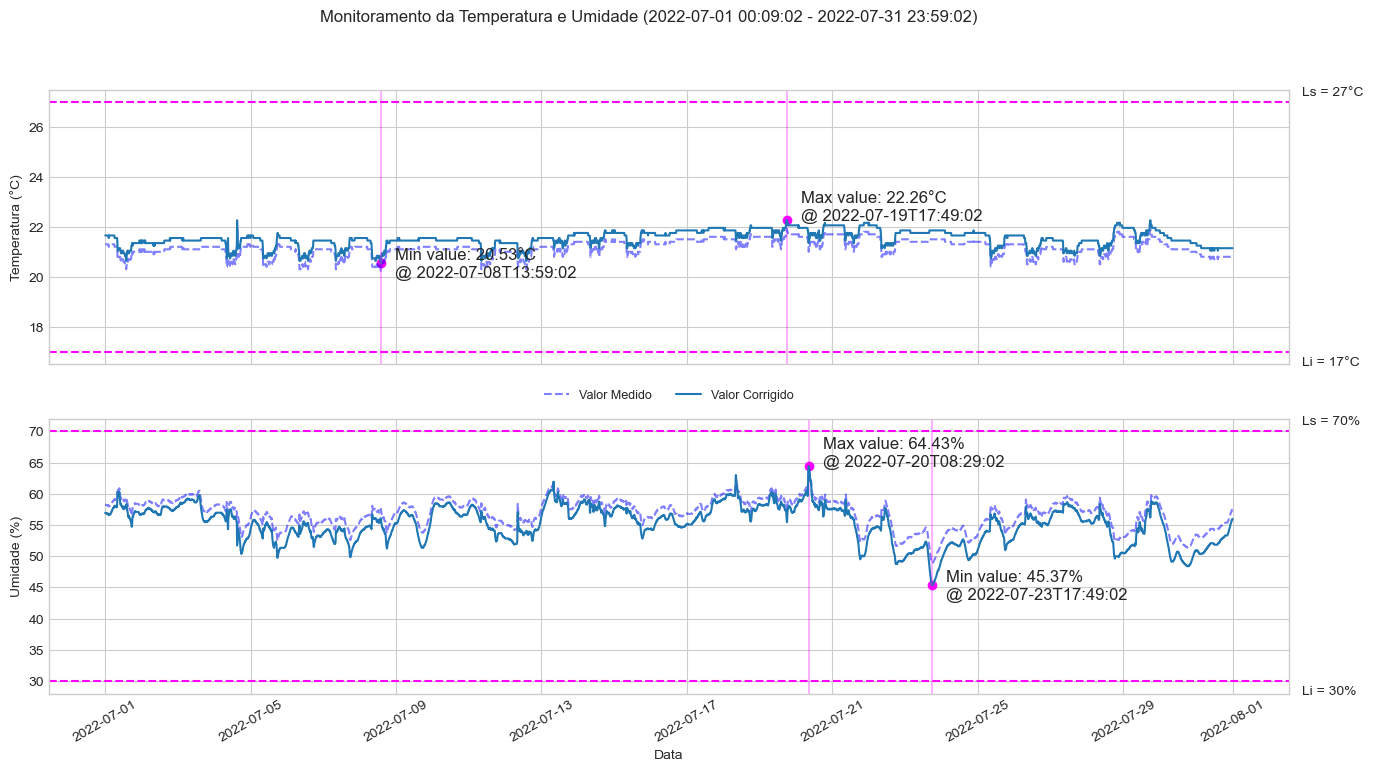

In [3]:
df = analise_temp_umid(excel_file='.\data\Sala_Ctrl\dados_jul22.xlsm',
                  temp_ind=[14.9, 24.7, 34.4], # Temperatura indicada no sensor - certificado calib.
                  temp_ref=[15.1, 25.1, 34.8], # Temperatura efetiva (referencia) -certificado calib.
                  umid_ind=[40.8, 54.4, 66.9, 78.6], # Umidade indicada no sensor -certificado calib.
                  umid_ref=[35.8, 52.1, 68.1, 84.0], # Umidade efetiva (referencia) -certificado calib.
                  temp_lab=22,
                  tol_temp=5,
                  umid_lab=50,
                  tol_umid=20,
                  sensor_digital=True)

### Hall Testes

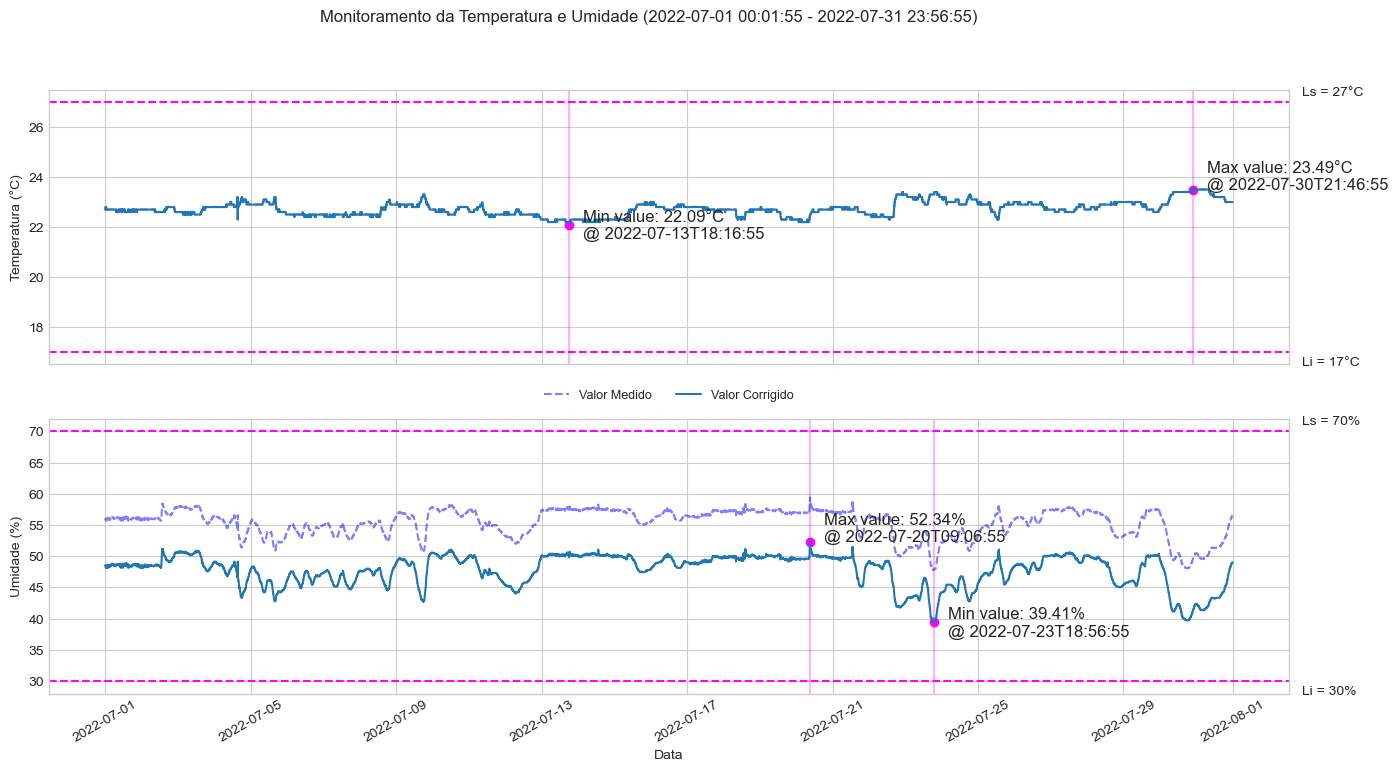

In [4]:
df = analise_temp_umid(excel_file='.\data\Hall_Teste\dados_jul22_HT.xlsm',
                  temp_ind=[15.2, 25.0, 34.6], # Temperatura indicada no sensor - certificado calib.
                  temp_ref=[15.2, 25.0, 34.7], # Temperatura efetiva (referencia) -certificado calib.
                  umid_ind=[43.3, 57.7, 70.9, 83.3], # Umidade indicada no sensor -certificado calib.
                  umid_ref=[34.6, 50.4, 65.9, 81.3], # Umidade efetiva (referencia) -certificado calib.
                  temp_lab=22,
                  tol_temp=5,
                  umid_lab=50,
                  tol_umid=20,
                  sensor_digital=True)

***

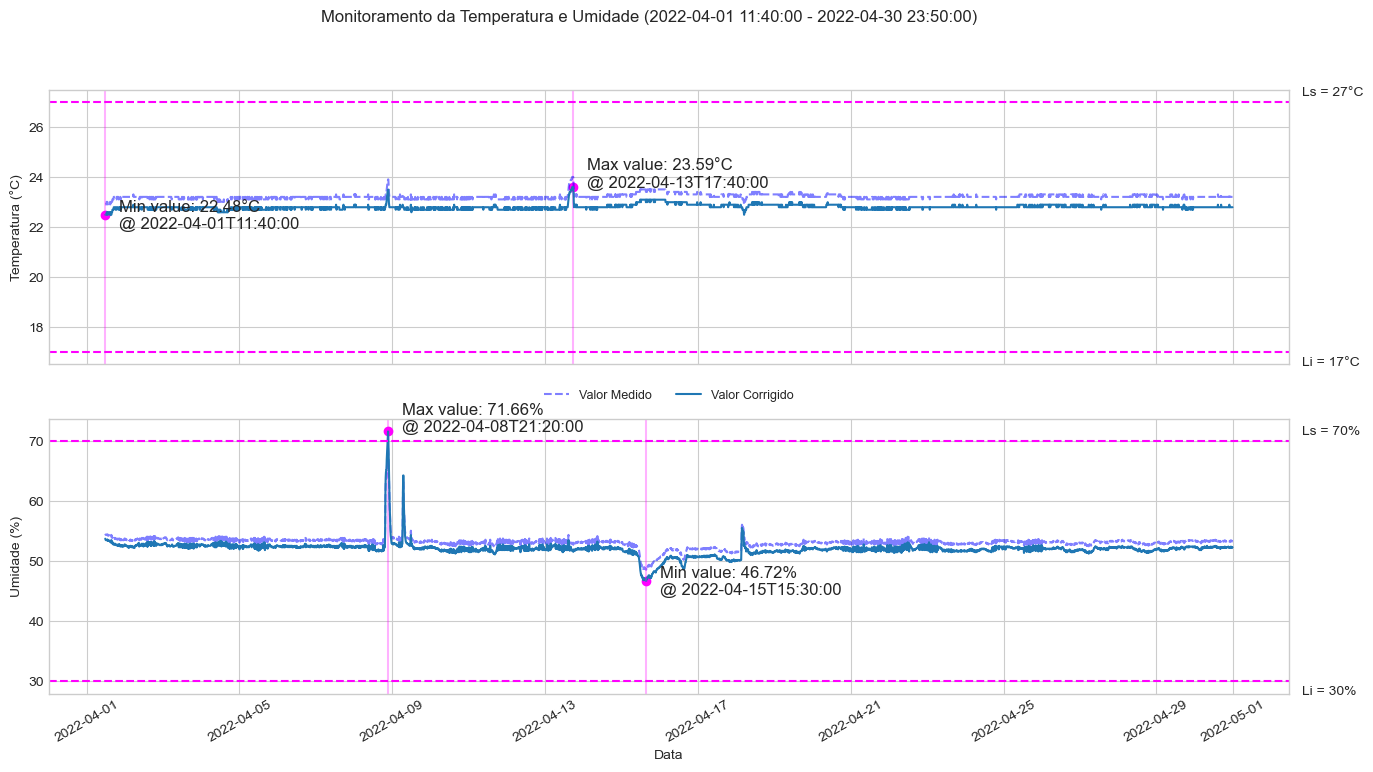

In [37]:
df = analise_temp_umid(excel_file='.\data\Hall_Teste\dados_abr22_HT.xlsm',                       
                  temp_ind=[15.6, 25.5, 35.2], # Temperatura indicada no sensor - certificado calib.
                  temp_ref=[15.1, 25.1, 34.8], # Temperatura efetiva (referencia) -certificado calib.
                  umid_ind=[38.8, 53.2, 66.2, 78.5], # Umidade indicada no sensor -certificado calib.
                  umid_ref=[35.8, 52.1, 68.1, 84.0], # Umidade efetiva (referencia) -certificado calib.
                  temp_lab=22,
                  tol_temp=5,
                  umid_lab=50,
                  tol_umid=20,
                  sensor_digital=True)